In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math

In [37]:
#signal - signal
#N - start number of sampling
#M - new number of sampling

def resampling(x, signal, M):
    def upSample(N,M,spectrum):
        newSpectrum = np.zeros(M, dtype = np.complex128)
        if (N%2==0):
            for i in range(0,(N+1)//2-1):
                newSpectrum[i] = spectrum[i]
            for i in range((N+1)//2, (N+1)//2+M-N-1):
                newSpectrum[i] = 0
            for i in range((N+1)//2+M-N, M-1):
                newSpectrum[i] = spectrum[i-M+N]
        else:
            for i in range(0,N//2-1):
                newSpectrum[i] = spectrum[i]
            newSpectrum[N//2] = spectrum[(N//2)]//2
            for i in range(N//2+1, N//2+M-N-1):
                newSpectrum[i] = 0
            newSpectrum[N//2+M-M] = spectrum[(N//2)]//2    
            for i in range(N//2+M-N+1, M-1):
                newSpectrum[i] = spectrum[i-M+N]
        newSpectrum = newSpectrum*M/N
        return newSpectrum
    
    N = len(signal)
    spectrum = np.fft.fft(signal)
    newX = np.arange(x[0], x[len(x)-1], (x[len(x)-1]-x[0])/M) [:M]
    tmpM = N*M // math.gcd(N,M)
    print(tmpM)
    newSpectrumTMP = upSample(N,tmpM,spectrum)
    newSignalTMP = np.fft.ifft([newSpectrumTMP[i] if (i<M/2 or i>(tmpM-M/2)) else 0 for i in range(tmpM)])
    #newSignalTMP = np.fft.ifft(newSpectrumTMP)
    newSignal = np.zeros(M)
    for i in range(M):
        newSignal[i] = newSignalTMP[int(i/M*tmpM)] 
    return newX, np.real(newSignal)

def freq(x: np.array):
    return np.fft.fftfreq(x.size, d=x[1]-x[0])

from IPython.display import display, clear_output
def doTask(x, signal, M):
    w = freq(x)
    newX, newSignal = resampling(x, signal, M)
    newW = freq(newX)
    clear_output(wait=True)
    plt.figure(figsize=(14,8))
    plt.subplot(2,2,1)
    plt.title("signal")
    plt.plot(x, signal)
    plt.subplot(2,2,2)
    plt.title("spectrum")
    plt.scatter(w[:len(w)//2], np.abs(np.fft.fft(signal))[:len(w)//2])
    plt.subplot(2,2,3)
    plt.title("new signal")
    plt.plot(newX, newSignal)
    plt.subplot(2,2,4)
    plt.title("new spectrum")
    plt.scatter(newW[:len(newW)//2], np.abs(np.fft.fft(newSignal))[:len(newW)//2])
    plt.show()


In [38]:
def testFunc1(x):
    return [10*np.cos(5*x[i])+3*np.cos(15*x[i])+10*np.cos(40*x[i])   for i in range(len(x))]

def testFunc2(x):
    return [np.random.uniform(len(x)-i) for i in range(len(x))]

def testFunc3(x):
    return [np.random.uniform(len(x)) for i in range(len(x))]

def testFunc4(x):
    return [0.5 if (i//20)%2==0 else -0.5 for i in range(len(x))]

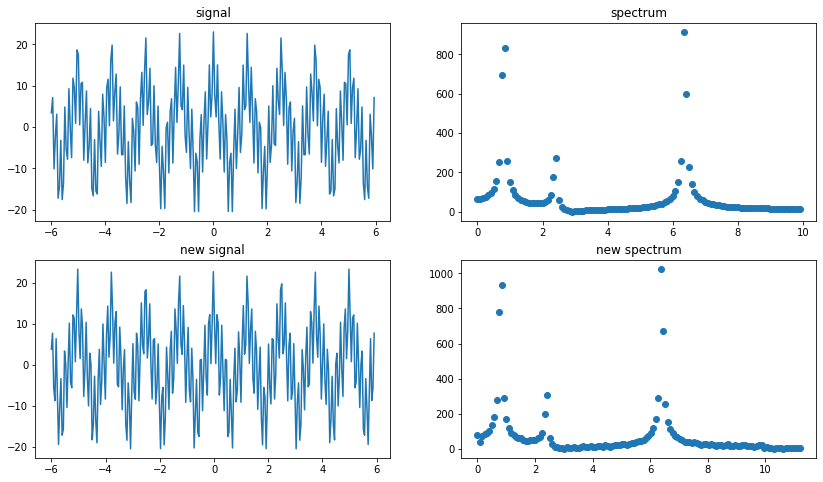

In [41]:
x = np.arange(-6,6,0.05)
doTask(x, testFunc1(x), 270)

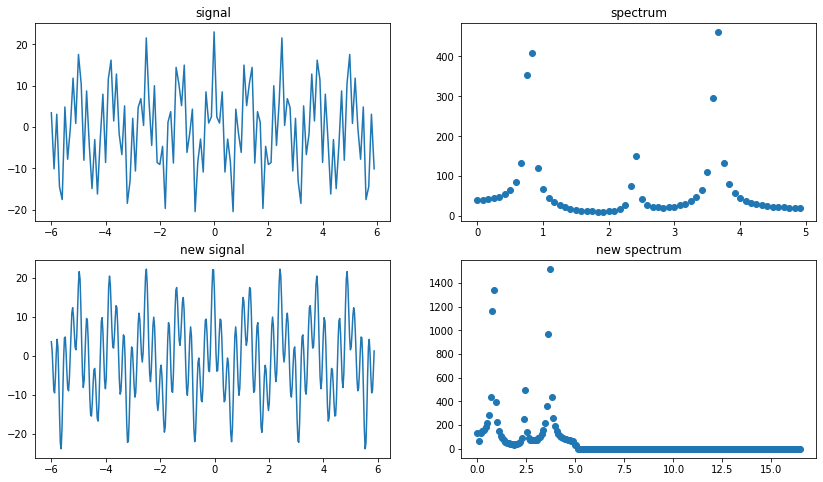

In [42]:
x = np.arange(-6,6,0.1)
buffer = testFunc1(x)
for i in range(1,80):
    doTask(x, buffer, i*5)

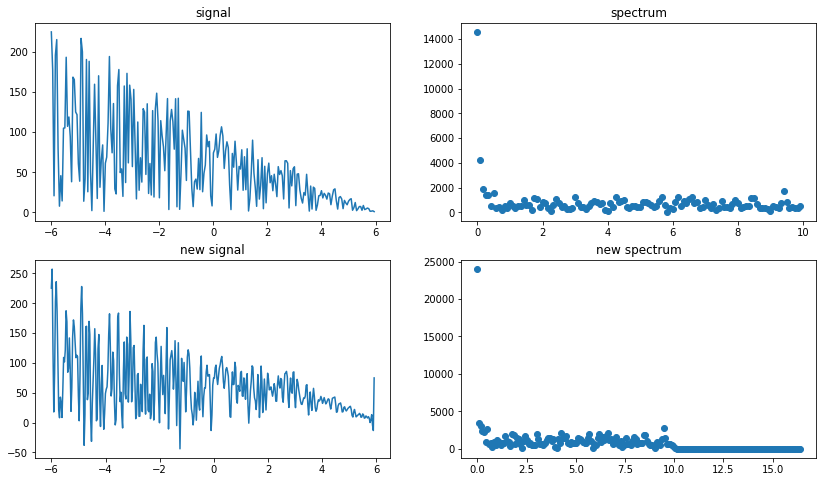

In [175]:
x = np.arange(-6,6,0.05)
buffer = testFunc2(x)
for i in range(1,80):
    doTask(x, buffer, i*5)

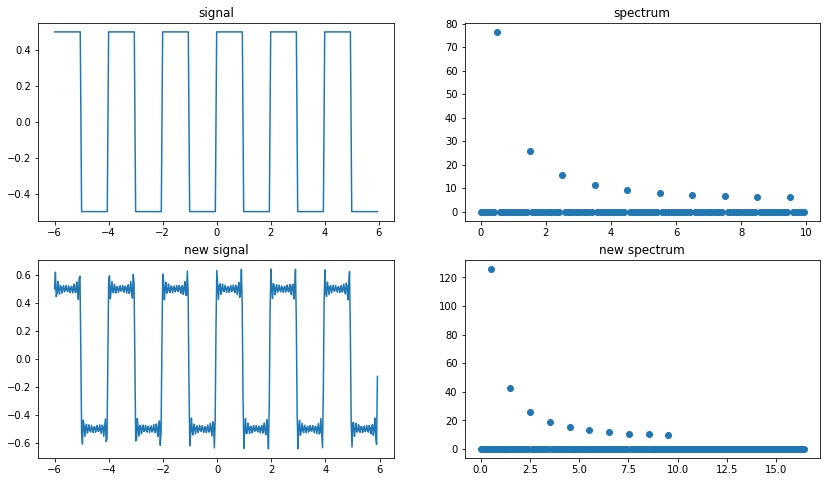

In [173]:
x = np.arange(-6,6,0.05)
buffer = testFunc4(x)
for i in range(1,80):
    doTask(x, buffer, i*5)